In [3]:
#import libraries
import os
import zipfile
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import keras
import cv2
%matplotlib inline

#import K-Means
from sklearn.cluster import KMeans
# important metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from skimage.feature import hog


In [7]:
DATADIR = 'D:\CV\CP\Train'
CATEGORIES = ['backhand','forehand']

In [12]:
data = []
label = []
c = 0
d = 0

for category in CATEGORIES:
    path=os.path.join(DATADIR, category)
    for file in os.listdir(path):
        img = cv2.imread(os.path.join(path,file))
        img=cv2.resize(img,(150,150))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
        img = img.astype('float32')
        fd, img = hog(img, orientations=9, pixels_per_cell=(2, 2),
                        cells_per_block=(5, 5), visualize=True, multichannel=True)
        
        if file[:8]=='forehand':
            if c==3800: continue
            c+=1
            label.append("forehand")
        else:
            if d==3800: continue
            d+=1
            label.append("backhand")
        data.append(img)
data = np.array(data)


In [13]:
# converting label forehand to 0 and backhand to 1
data_label = []
for i in label:
    if i=="forehand": data_label.append(0)
    else: data_label.append(1)
data_label = np.array(data_label)

In [14]:
# Data Normalization

# Normalization
data = data/255.0
    
# k-means accept data with less than 3 dimensions
reshaped_data = data.reshape(len(data),-1)
reshaped_data.shape

(100, 22500)

In [15]:
# Applying K-Means Clustering
kmeans = KMeans(n_clusters=2, random_state=0)
clusters = kmeans.fit_predict(reshaped_data)
kmeans.cluster_centers_.shape

(2, 22500)

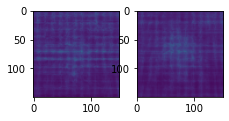

In [17]:
# This is how our centroids look like
kmeans.cluster_centers_ = kmeans.cluster_centers_*255
plt.figure(figsize = (10,9))
bottom = 0.35
for i in range(2):
    plt.subplots_adjust(bottom)
    plt.subplot(4,4,i+1)
    plt.imshow(kmeans.cluster_centers_[i].astype(int).reshape(150,150))

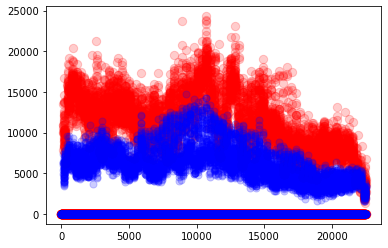

In [19]:
x_data = [i for i in range(22500)]
plt.scatter(x_data,kmeans.cluster_centers_[0], color = 'red',alpha=0.2,s=70)
plt.scatter(x_data,kmeans.cluster_centers_[1] , color = 'blue',alpha=0.2,s=50)

In [20]:
# Since K-Means Does not know about our labels we have to change labels of k-means according to our usage

# mapping labels from cluster to original labels
def get_reference_dict(clusters,data_label):
    reference_label = {}
    # For loop to run through each label of cluster label
    for i in range(len(np.unique(clusters))):
        index = np.where(clusters == i,1,0)
        num = np.bincount(data_label[index==1]).argmax()
        reference_label[i] = num
    return reference_label

# Mapping predictions to original labels
def get_labels(clusters,refernce_labels):
    temp_labels = np.random.rand(len(clusters))
    for i in range(len(clusters)):
        temp_labels[i] = reference_labels[clusters[i]]
    return temp_labels

In [21]:
reference_labels = get_reference_dict(clusters,data_label)
predicted_labels = get_labels(clusters,reference_labels)

In [22]:
# Accuracy Score for right predictions
print(accuracy_score(predicted_labels,data_label))

0.64


Text(0.5, 15.0, 'predicted label')

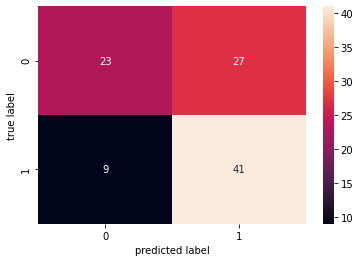

In [23]:
mat = confusion_matrix(data_label,predicted_labels)
sns.heatmap(mat, annot=True)
plt.ylabel('true label')
plt.xlabel('predicted label')

Accuracy for k = 2:  0.63
Accuracy for k = 4:  0.64
Accuracy for k = 6:  0.59
Accuracy for k = 8:  0.61
Accuracy for k = 10:  0.66
Accuracy for k = 12:  0.63
Accuracy for k = 14:  0.65
Accuracy for k = 16:  0.72
Accuracy for k = 18:  0.68
Accuracy for k = 20:  0.69
Accuracy for k = 22:  0.71
Accuracy for k = 24:  0.67
Accuracy for k = 26:  0.72
Accuracy for k = 28:  0.75
Accuracy for k = 30:  0.7
Accuracy for k = 32:  0.74
Accuracy for k = 34:  0.72
Accuracy for k = 36:  0.78
Accuracy for k = 38:  0.76


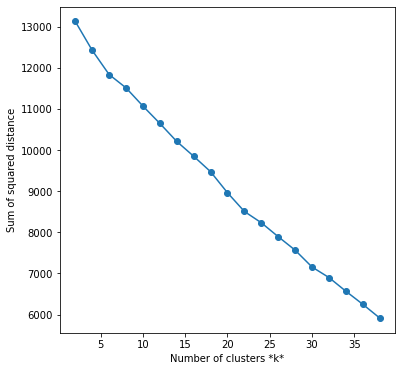

In [24]:
# elbow method
# squared distance
sse = []
list_k =  range(2,40,2)

for k in list_k:
    km = KMeans(n_clusters=k)
    clusters = km.fit_predict(reshaped_data)
    sse.append(km.inertia_)
    
    reference_labels = get_reference_dict(clusters,data_label)
    predicted_labels = get_labels(clusters,reference_labels)
    
    print(f"Accuracy for k = {k}: ", accuracy_score(predicted_labels,data_label))

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');